# Abortion rates in Europe
### What's the correlation between percentage of catholic population and the abortion rate
Rate = abortions per 1000 births

1. Scatter Plot with. y = Total number abortions per 1000 births, x = percentage of non-catholic population

## Imports

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

## Abortion data

In [16]:
df = pd.read_csv('d/abortionEU.csv')
df = df[df['Year']==2015]
del df['Unnamed: 4']
del df['Unnamed: 3']

In [17]:
sort = df.sort_values(by='Count', ascending=False).reset_index()
del sort['index']
sort

,Country,Year,Count
0,GEO,2015,424
1,BGR,2015,421
2,RUS,2015,385
3,ROU,2015,378
4,MDA,2015,364
5,EST,2015,354
6,HUN,2015,340
7,SWE,2015,331
8,ARM,2015,270
9,FRA,2015,268


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 35 to 1420
Data columns (total 3 columns):
Country    40 non-null object
Year       40 non-null int64
Count      40 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


## Country Codes

In [19]:
c = pd.read_csv('d/countrycodes.csv')

In [20]:
c.head()

,Country / Territory,ISO-3166-2,ISO-3166-3,ccTLD
0,Albania,AL,ALB,.al
1,Andorra,AD,AND,.ad
2,Austria,AT,AUT,.at
3,Belarus,BY,BLR,.by
4,Belgium,BE,BEL,.be


In [22]:
df_ = df.merge(c, left_on='Country', right_on='ISO-3166-3')

In [23]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 7 columns):
Country                31 non-null object
Year                   31 non-null int64
Count                  31 non-null int64
Country / Territory    31 non-null object
ISO-3166-2             31 non-null object
ISO-3166-3             31 non-null object
ccTLD                  31 non-null object
dtypes: int64(2), object(5)
memory usage: 1.9+ KB


## Non-Catholics

In [24]:
pop = pd.read_csv('d/Population.csv')
cath = pd.read_csv('d/catholics.csv')
nochurch = pd.read_csv('d/NoChurch.csv')

In [25]:
cath_ = pop.merge(cath, left_on='Country', right_on='Country')
cath_['Percent of None Cath'] = round(((cath_['Catholics'] / cath_[' Population'] * 100)-100)*-1, 1)

## Non-Catholics and Abortions

In [26]:
df_ = df_.merge(cath_, left_on='Country / Territory', right_on='Country')

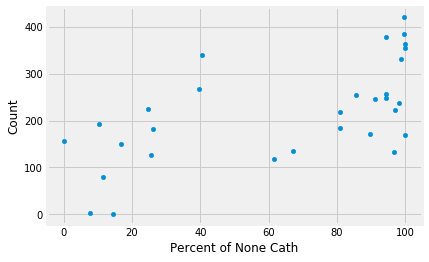

In [27]:
df_.plot(kind='scatter', x='Percent of None Cath', y='Count')

## No-Church and Abortions

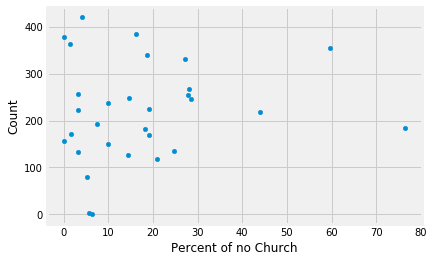

In [28]:
nochurch_ = pop.merge(nochurch, left_on='Country', right_on='Country')
nochurch_['Percent of no Church'] = round((nochurch_[' Population_y'] / nochurch_[' Population_x'] * 100), 1)
df_ = df_.merge(nochurch_, left_on='Country / Territory', right_on='Country')
df_.plot(kind='scatter', x='Percent of no Church', y='Count')